In [ ]:
import pandas as pd

games_df = pd.read_csv('/content/drive/MyDrive/Estudos/Ciência de Dados/Colab/Games.csv')
imdb_games_df = pd.read_csv('/content/drive/MyDrive/Estudos/Ciência de Dados/Colab/imdb-videogames.csv')
vgsales_df = pd.read_csv('/content/drive/MyDrive/Estudos/Ciência de Dados/Colab/vgsales.csv')
indie_games_df = pd.read_csv('/content/drive/MyDrive/Estudos/Ciência de Dados/Colab/indie-games-developers.csv')

In [ ]:
# vgsales_df.columns
imdb_games_df.columns
# games_df.columns

Index(['Unnamed: 0', 'name', 'url', 'year', 'certificate', 'rating', 'votes',
       'plot', 'Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy',
       'Mystery', 'Sci-Fi', 'Thriller'],
      dtype='object')

games_df - colunas: REVIEW e Score; Coluna importante GameName

imdb_games_df - Colunas: name, votes

Tentar transformar as colunas de categorias em uma única coluna categoria

vgsales_df - Colunas: Name, Platform, Genre, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales. Rank

indie_games_df - Colunas: Developer, Notable games, Notes

In [ ]:
# Verificar dados faltantes em colunas processo afeta o dataframe original
vgsales_df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
imdb_games_df.isnull().sum()

,0
Unnamed: 0,0
name,0
url,0
year,267
certificate,12900
rating,9203
votes,9203
plot,0
Action,0
Adventure,0


In [ ]:
# Preenchendo os valores NaN na coluna 'Publisher' com 'Unknown'
vgsales_df['Publisher'] = vgsales_df['Publisher'].fillna('Unknown')

Identificar e remover dados duplicados

In [ ]:
vgsales_df.duplicated().sum()
# Saída
# np.int64(0)

np.int64(0)

Padronização dos dados

Verificação dos formatos de dados

In [ ]:
# Verificar os titpos de dados
vgsales_df['Global_Sales'].dtype

dtype('float64')

In [ ]:
vgsales_df.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


Remover colunas desnecessárias à análise

1º Criar uma lista das colunas a remover
2º Usar a função drop() para remover as colunas
3º Incluir o parâmetro 'axis=1' para informar o pandas que deve ser removida a coluna e não a linha
4º Incluir o parâmetro 'inplace=True' para modificar diretamente no dataframe

In [ ]:
colunas_para_remover = ['Rank', 'Platform', 'Year']
vgsales_df.drop(colunas_para_remover, axis=1, inplace=True)

In [ ]:
vgsales_df.dtypes

,0
Name,object
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64
Global_Sales,float64


Agora começar a análise enfim

1º Agrupar os dados pela coluna 'Genre' e somar as vendas globais
2º Ordenar o resultado em ordem decrescente
3º Exibir os 5 primeiros generos

In [ ]:
# Agrupar os dados pela coluna 'Genre'
generos_mais_vendidos_global = vgsales_df.groupby('Genre')['Global_Sales'].sum()
generos_mais_vendidos_eu = vgsales_df.groupby('Genre')['EU_Sales'].sum()
generos_mais_vendidos_jp = vgsales_df.groupby('Genre')['JP_Sales'].sum()
generos_mais_vendidos_na = vgsales_df.groupby('Genre')['NA_Sales'].sum()

# Ordenar de modo decrescente
generos_mais_vendidos_global = generos_mais_vendidos_global.sort_values(ascending=False)
generos_mais_vendidos_eu = generos_mais_vendidos_eu.sort_values(ascending=False)
generos_mais_vendidos_jp = generos_mais_vendidos_jp.sort_values(ascending=False)
generos_mais_vendidos_na = generos_mais_vendidos_na.sort_values(ascending=False)

# Exibir os 5 primeiros gêneros mais vendidos
print(f"Global Sales\n{generos_mais_vendidos_global}")
print(f"\nEurope Sales:\n{generos_mais_vendidos_eu.head()}")
print(f"\nJapain Sales\n{generos_mais_vendidos_jp.head()}")
print(f"\nNorth American Sales\n{generos_mais_vendidos_na.head()}")

Global Sales
Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

Europe Sales:
Genre
Action     525.00
Sports     376.85
Shooter    313.27
Racing     238.39
Misc       215.98
Name: EU_Sales, dtype: float64

Japain Sales
Genre
Role-Playing    352.31
Action          159.95
Sports          135.37
Platform        130.77
Misc            107.76
Name: JP_Sales, dtype: float64

North American Sales
Genre
Action      877.83
Sports      683.35
Shooter     582.60
Platform    447.05
Misc        410.24
Name: NA_Sales, dtype: float64


In [ ]:
# Calcular o percentual de cada gênero
percentual_por_genero = (generos_mais_vendidos_global / generos_mais_vendidos_global.sum()) * 100

# Criando um novo dataframe 'vendas_e_percentual'
# Usar a coluna Genre para ser a coluna normal, para isso utilizar o método .reset_index()
vendas_e_percentual = generos_mais_vendidos_global.reset_index(name='Globals Sales (un)')

# Adiciona a nova coluna percentual
vendas_e_percentual['Percentual (%)'] = percentual_por_genero.values

# Ordenar a visualização
vendas_e_percentual = vendas_e_percentual.sort_values(by='Globals Sales (un)', ascending=False)

# Formatar a coluna percentual para apresentação dos dados
vendas_e_percentual['Percentual (%)'] = vendas_e_percentual['Percentual (%)'].map(lambda x: f'{x:.2f}')

print(vendas_e_percentual)

           Genre  Globals Sales (un) Percentual (%)
0         Action             1751.18          19.63
1         Sports             1330.93          14.92
2        Shooter             1037.37          11.63
3   Role-Playing              927.37          10.40
4       Platform              831.37           9.32
5           Misc              809.96           9.08
6         Racing              732.04           8.21
7       Fighting              448.91           5.03
8     Simulation              392.20           4.40
9         Puzzle              244.95           2.75
10     Adventure              239.04           2.68
11      Strategy              175.12           1.96


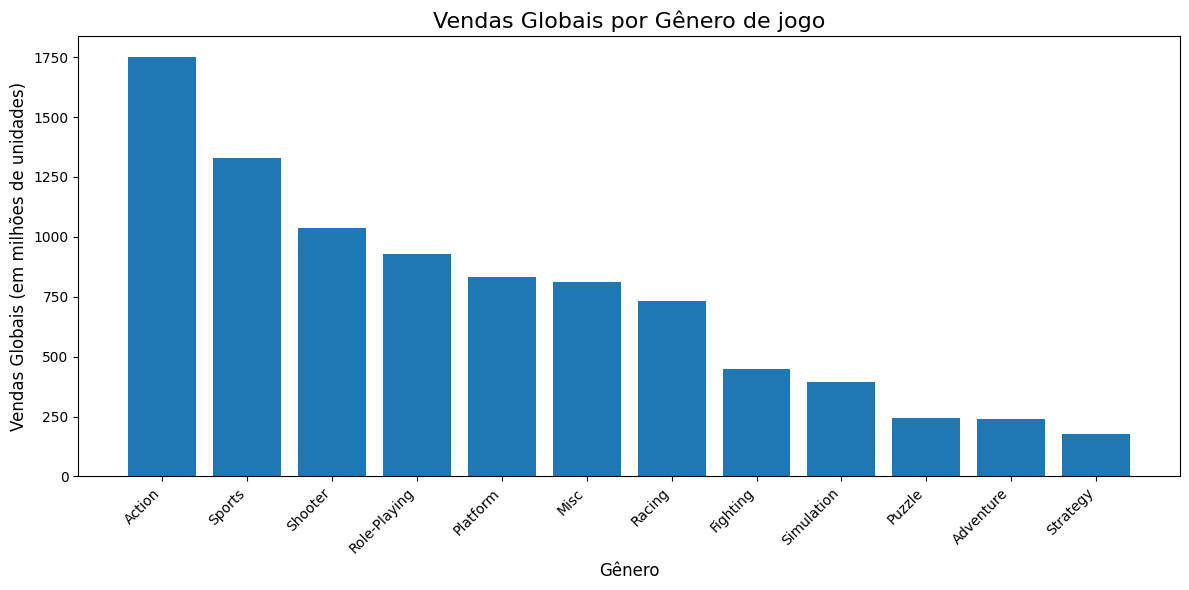

In [ ]:
import matplotlib.pyplot as plt

# Criação do gráfico de barras
plt.figure(figsize=(12, 6)) # Definição do tamanho do gráfico
plt.bar(vendas_e_percentual['Genre'], vendas_e_percentual['Globals Sales (un)'])


# Adiciona títulos e rótulo
plt.title('Vendas Globais por Gênero de jogo', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Vendas Globais (em milhões de unidades)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Gira os rótulos do eixo X para não ficarem sobrepostos
plt.tight_layout() # Ajusta o layout para evitar cortes

plt.show() # Mostra o gráfico


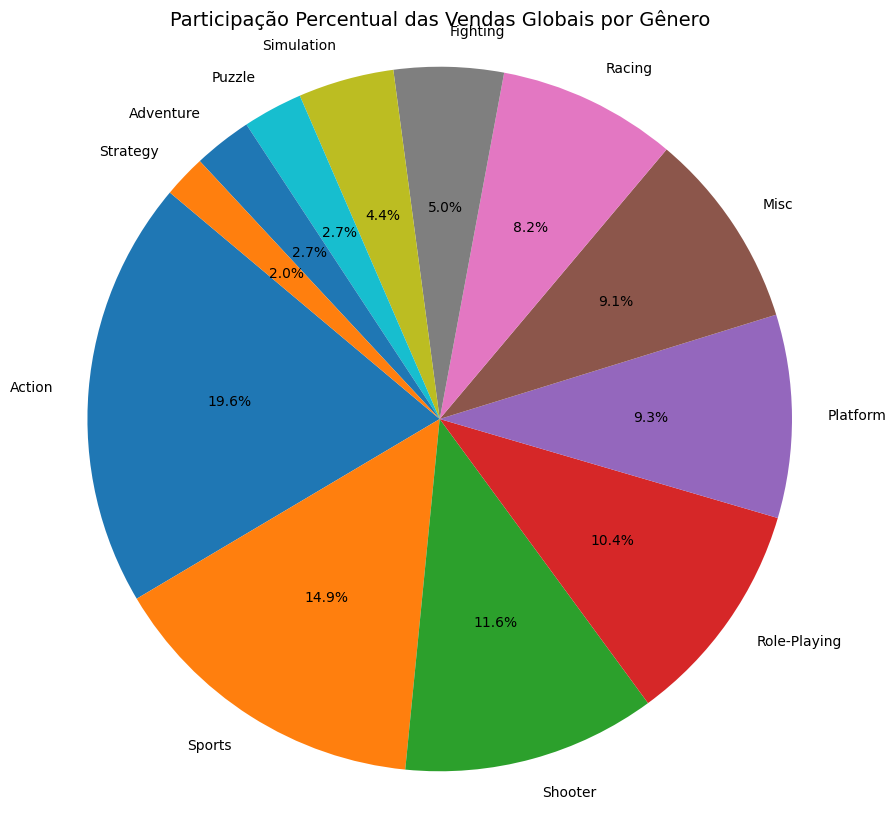

In [ ]:
# Um gráfico de setores (pizza) para entender a participação de cada genero nas vendas globais

# Definindo os rótulos
vendas = vendas_e_percentual['Globals Sales (un)']
generos =vendas_e_percentual['Genre']

plt.figure(figsize=(10, 10))

plt.pie(vendas, labels=generos, autopct='%1.1f%%', startangle=140) # autopct=%1.1f%% forma os percentuais para mostrar em casa decimal

# Adiciona um título
plt.title('Participação Percentual das Vendas Globais por Gênero', fontsize=14)
plt.axis('equal') # Garante que o gráfico de pizza seja um círculo perfeito
plt.show()

In [ ]:
publishers_global = vgsales_df.groupby('Publisher')['Global_Sales'].sum()
publishers_na = vgsales_df.groupby('Publisher')['NA_Sales'].sum()
publishers_eu = vgsales_df.groupby('Publisher')['EU_Sales'].sum()
publishers_jp = vgsales_df.groupby('Publisher')['JP_Sales'].sum()

publishers_global = publishers_global.sort_values(ascending=False)
publishers_na = publishers_na.sort_values(ascending=False)
publishers_eu = publishers_eu.sort_values(ascending=False)
publishers_jp = publishers_jp.sort_values(ascending=False)

# print(f"\nPublicadores de Jogos de maior sucesso Global\n{publishers_global}")
print(f"\nTop publishers games Global Sales\n{publishers_global.head(10)}")
print(f"\nPublicadores de Jogos de maior sucesso North America\n{publishers_na.head()}")
print(f"\nPublicadores de Jogos de maior sucesso Europe\n{publishers_eu.head()}")
print(f"\nPublicadores de Jogos de maior sucesso Japain\n{publishers_jp.head()}")


Top publishers games Global Sales
Publisher
Nintendo                        1786.56
Electronic Arts                 1110.32
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Sega                             272.99
Namco Bandai Games               254.09
Name: Global_Sales, dtype: float64

Publicadores de Jogos de maior sucesso North America
Publisher
Nintendo                       816.87
Electronic Arts                595.07
Activision                     429.70
Sony Computer Entertainment    265.22
Ubisoft                        253.43
Name: NA_Sales, dtype: float64

Publicadores de Jogos de maior sucesso Europe
Publisher
Nintendo                       418.74
Electronic Arts                371.27
Activision                     215.53
Sony Computer Entertainment    187.72
Ubisoft                   

Agora responder a terceira pergunta: Por quê o sucesso de vendas de certa categoria de jogos?

Para isso vamos investigar dos DataFrames quais representam melhor opção ou talvez a combinação de mais de um dataframe.

In [ ]:
imdb_games_df.columns

Index(['Unnamed: 0', 'name', 'url', 'year', 'certificate', 'rating', 'votes',
       'plot', 'Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy',
       'Mystery', 'Sci-Fi', 'Thriller'],
      dtype='object')

Parece que para entender o sucesso de vendas, no dataframe imdb_games temos duas colunas principais: 'rating' e 'votes', então vou começar a validação e limpeza de dados por essas colunas:

Validar dados na coluna rating:
Verificar se há valores nulos:
imdb_games_df.isnull().sum() -> verificar se há valores nulos e determinar se esses dados interferem na análise.

In [ ]:
print('\nDescrição da tabela')
# imdb_games_df.dtypes

# print('\nColunas com valores nulos\n')
# imdb_games_df.isnull().sum()

print("\nVerificando valores com entrada de tipo diferente")
imdb_games_df.isna().sum()


Descrição da tabela

Verificando valores com entrada de tipo diferente


,0
Unnamed: 0,0
name,0
url,0
year,267
certificate,12900
rating,9203
votes,9203
plot,0
Action,0
Adventure,0


Fazer o merge entre os dataframes: vgsales e imdg_games, juntando as tabelas e tentar traçar uma relação entre o número de vendas e o rating de cada categoria de jogos.  

Para isso vamos realizar a função merge do pandas.
Para isso escolhemos uma coluna que seja comum entre os dois data frames:

print(f"Colunas VGSALES: {vgsales_df.columns}")

print(f"\nColuna IMDB_GAMES: {imdb_games_df.columns}")

### SAÍDA
Colunas VGSALES: Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', # 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Coluna IMDB_GAMES: Index(['Unnamed: 0', 'name', 'url', 'year', 'certificate', 'rating', 'votes',
       'plot', 'Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy',
       'Mystery', 'Sci-Fi', 'Thriller'],
      dtype='object')


      Parece que a coluna comum é a coluna 'name'

In [ ]:
# vendas_com_notas_df = pd.merge(vgsales_df, imdb_games_df, on='name', how='inner')

imdb_games_df = imdb_games_df.rename(columns={"name": "Name"}) # <- renomeando a coluna name porque para realizar o merge as colunas dos dataframes precisam ter o mesmo nome.

vendas_com_notas_df = vgsales_df.merge(imdb_games_df, on='Name', how='inner')

In [ ]:
vendas_com_notas_df.drop_duplicates(subset='Name', keep='first', inplace=True)

In [ ]:
# Lista das colunas de categorias do df imdb para exclusão do df de união
colunas_para_remover = ['Action', 'Adventure','Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']

# Removendo as colunas
vendas_com_notas_df.drop(colunas_para_remover, axis=1, inplace=True)


In [ ]:
colunas_para_remover_final = ['Unnamed: 0', 'url', 'year', 'certificate', 'plot']

vendas_com_notas_df.drop(colunas_para_remover_final, axis=1, inplace=True)

In [ ]:
vendas_com_notas_df.head()

,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rating,votes
0,Wii Sports,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,7.7,"3,883"
1,Super Mario Bros.,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,8.9,"6,207"
3,Mario Kart Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,8.4,"3,925"
5,Wii Sports Resort,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,7.8,"1,435"
6,Tetris,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,8.4,147


Agora para conseguir responder a terceira pergunta: Por que um jogo vende bem?

Para isso vou usar duas colunas: vendas_globais e rating

Farei uma *análise de correção*. O que é isso?

É uma medida estatística que nos diz se duas variáveis se movem juntas e em qual direção.
O resultado é um número entre -1 e 1
- 1: Correlação positiva perfeita - Ambas as variáveis sobem ou descem juntas;
- 0: Nenhuma correção - Movimento independente entre as variáveis;
- -1 Correlação negativa perfeita - Movimentos inversamente proporcionais;

Para esta análise, se a correlação for próxima de 1, então jogos com notas altas tendem a ter vendas altas;

No pandas há uma função chamada `corr()` que calcula a correlação entre as colunas de um dataframe

In [ ]:
# Rodando a correlação entre Global_Sales e Rating

correlacao_global_sales_x_rating = vendas_com_notas_df['rating'].corr(vendas_com_notas_df['Global_Sales'])
print(f"A correlação entre rating e Global_Sales e: {correlacao_global_sales_x_rating}")

A correlação entre rating e Global_Sales e: 0.19318052387751386


dtype('O')

Agora podemos verificar o quanto o sucesso de vendas fora representado pela votação no jogo, para isso faremos a correlação entre 'Global_Sales' e 'votes'. Entretanto a coluna votes está com o formato de dados em `object` (string) então precisamos converter para tipo numérico.

Para isso vamos passar por 2 passos;
1 - Converter os erroes em NaN, para isso vamos usar a função do pandas to_numeric(), utilizando o parâmetro `errors=coerce'

In [ ]:
vendas_com_notas_df['votes'] = pd.to_numeric(vendas_com_notas_df['votes'], errors='coerce')

# verificando o tipo de dados
print(vendas_com_notas_df['votes'].dtypes)

float64


Agora, sim podemos rodar a correlação

In [ ]:
correlacao_votos = vendas_com_notas_df['votes'].corr(vendas_com_notas_df['Global_Sales'])
print(f"A correlação entre votos e Global_Sales é: {correlacao_votos}")

A correlação entre votos e Global_Sales é: 0.27151468262644346
